# Overall plots

In [1]:
from cmcrameri import cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import TwoSlopeNorm


import numpy as np
import jax.numpy as jnp


Loading data for test_case_A


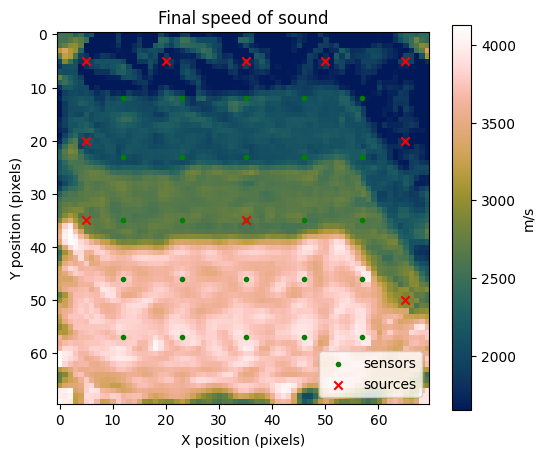

Loading data for test_case_C


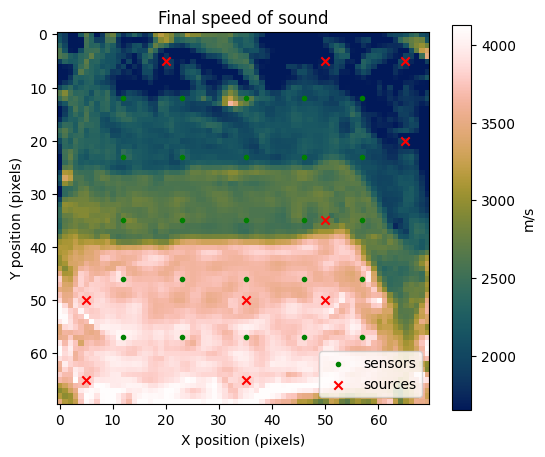

Loading data for test_case_D


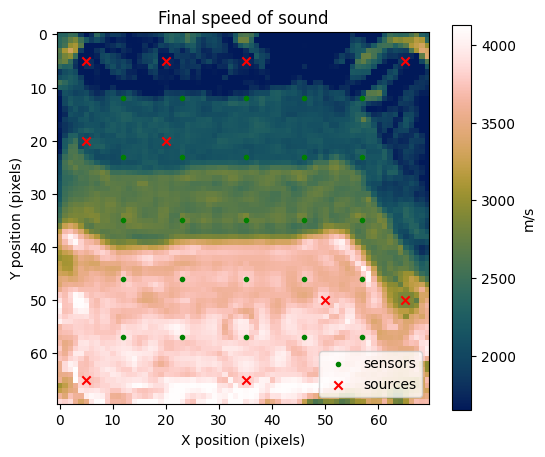

Loading data for test_case_BD


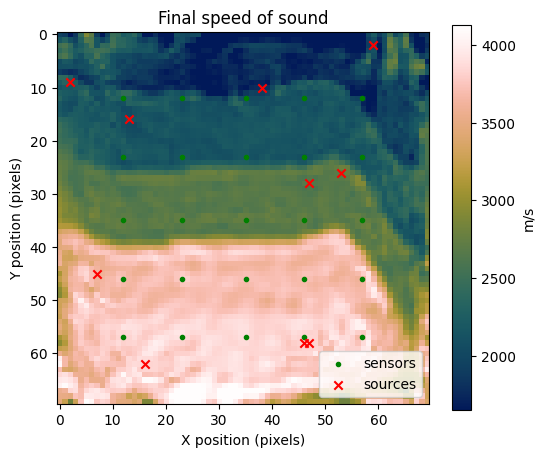

Loading data for comprehensive_case


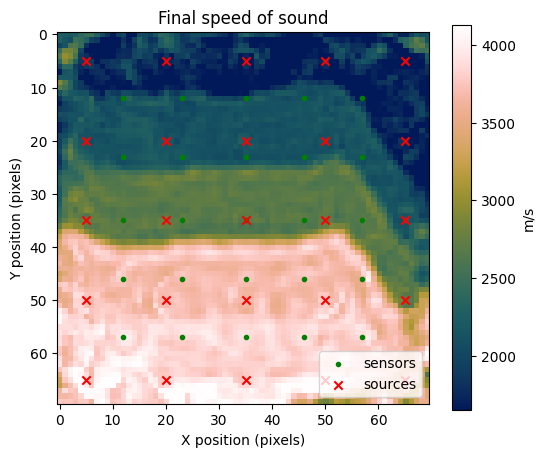

In [2]:
l1 = []
l2 = []
nRER = []

for file_name in ["test_case_A", "test_case_C","test_case_D","test_case_BD","comprehensive_case"]:
    # Load the data
    print("Loading data for {}".format(file_name))
    data = np.load("fwi_results_{}.npz".format(file_name))
    final_model = data["final_model"]
    source_positions = data["source_positions"]
    sensors_positions = data["sensors_positions"]
    true_model = data["true_model"]
    losshistory = data["losshistory"]
    reconstructions = data["reconstructions"]
    blurred_model = data["blurred_model"]
    homogenous_model = data["homogenous_model"]
    l1.append(data["l1_loss"])
    l2.append(data["l2_loss"])
    nRER.append(data["nRER"])
    # params = data["params"].item()
    # Plot the final model
    vmin = np.amin(true_model)
    vmax = np.amax(true_model)
    plt.figure(figsize=(6, 5))
    im = plt.imshow(final_model, cmap=cm.batlowW, vmin=vmin, vmax=vmax)
    plt.scatter(
        sensors_positions[1],
        sensors_positions[0],
        c="g",
        marker=".",
        label="sensors",
    )
    plt.scatter(
        source_positions[1],
        source_positions[0],
        c="r",
        marker="x",
        label="sources",
    )
    plt.legend(loc="lower right")
    plt.title("Final speed of sound")
    plt.xlabel("X position (pixels)")
    plt.ylabel("Y position (pixels)")
    plt.colorbar(im, label='m/s')

    plt.show()

(500, 1, 70, 70)


2025-09-30 10:00:28.361247: W external/xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


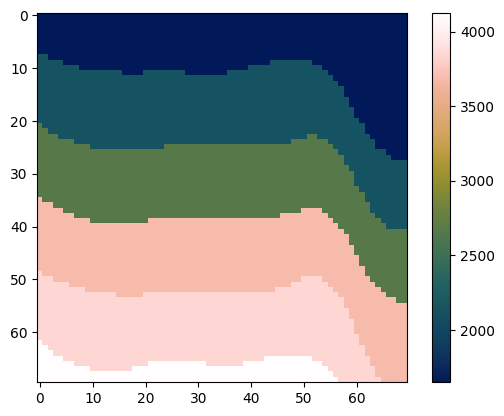

<class 'jaxlib.xla_extension.ArrayImpl'>


In [3]:
# load the TRue model
model = jnp.load('model1.npy')


print(model.shape)

model_index = 84

true_model = model[model_index,0,:,:]
plt.imshow(true_model,cmap=cm.batlowW)
plt.colorbar()
plt.show()
print(type(true_model))

RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

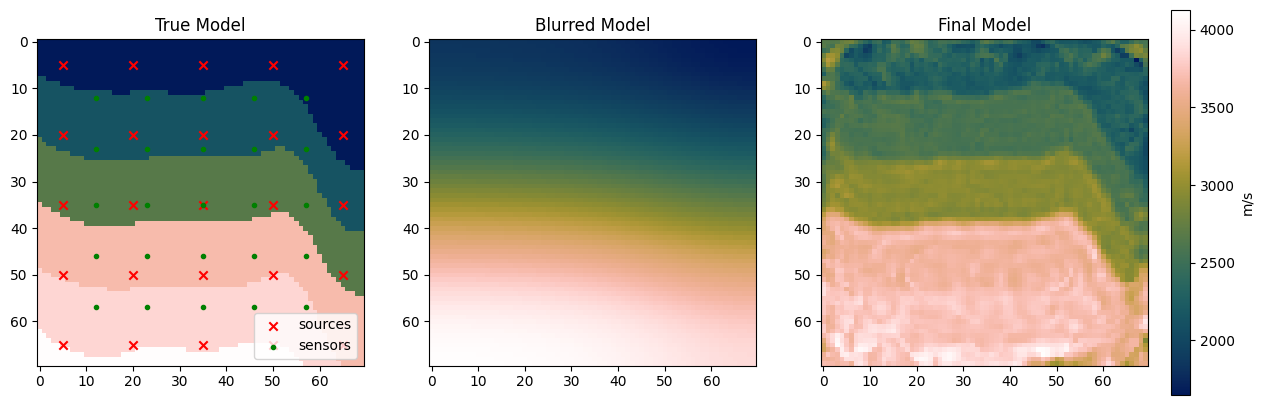

In [4]:
# make a plot with 1 row and 3 columns, the first is the true model, the second is the blurred model, and the third is the final model, add the source and receiver as a scattered points on the true model only put a single colorbar at the last row and make the last colunm not smaller
fig, axs = plt.subplots(1, 3, figsize=(15, 5),constrained_layout=True)
im1 = axs[0].imshow(true_model, cmap=cm.batlowW)
axs[0].set_title("True Model")
axs[0].scatter(
    source_positions[1],
    source_positions[0],
    c="r",
    marker="x",
    label="sources",
)
axs[0].scatter(
    sensors_positions[1],
    sensors_positions[0],
    c="g",
    marker=".",
    label="sensors",
)
axs[0].legend(loc="lower right")
axs[1].imshow(blurred_model, cmap=cm.batlowW)
axs[1].set_title("Blurred Model")
axs[2].imshow(final_model, cmap=cm.batlowW)
axs[2].set_title("Final Model")

cbar_top = fig.colorbar(
    im1,         # any one of the batlowW‐mappables
    ax=axs[:],         # span all axes in the first row
    orientation='vertical',
    fraction=0.025,       # bar width as fraction of figure width
    pad=0.02              # gap between axes and colorbar
)
cbar_top.set_label('m/s')


plt.tight_layout()
plt.show()

/tmp/ipykernel_2367544/1717831967.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axd.legend(loc="lower right")


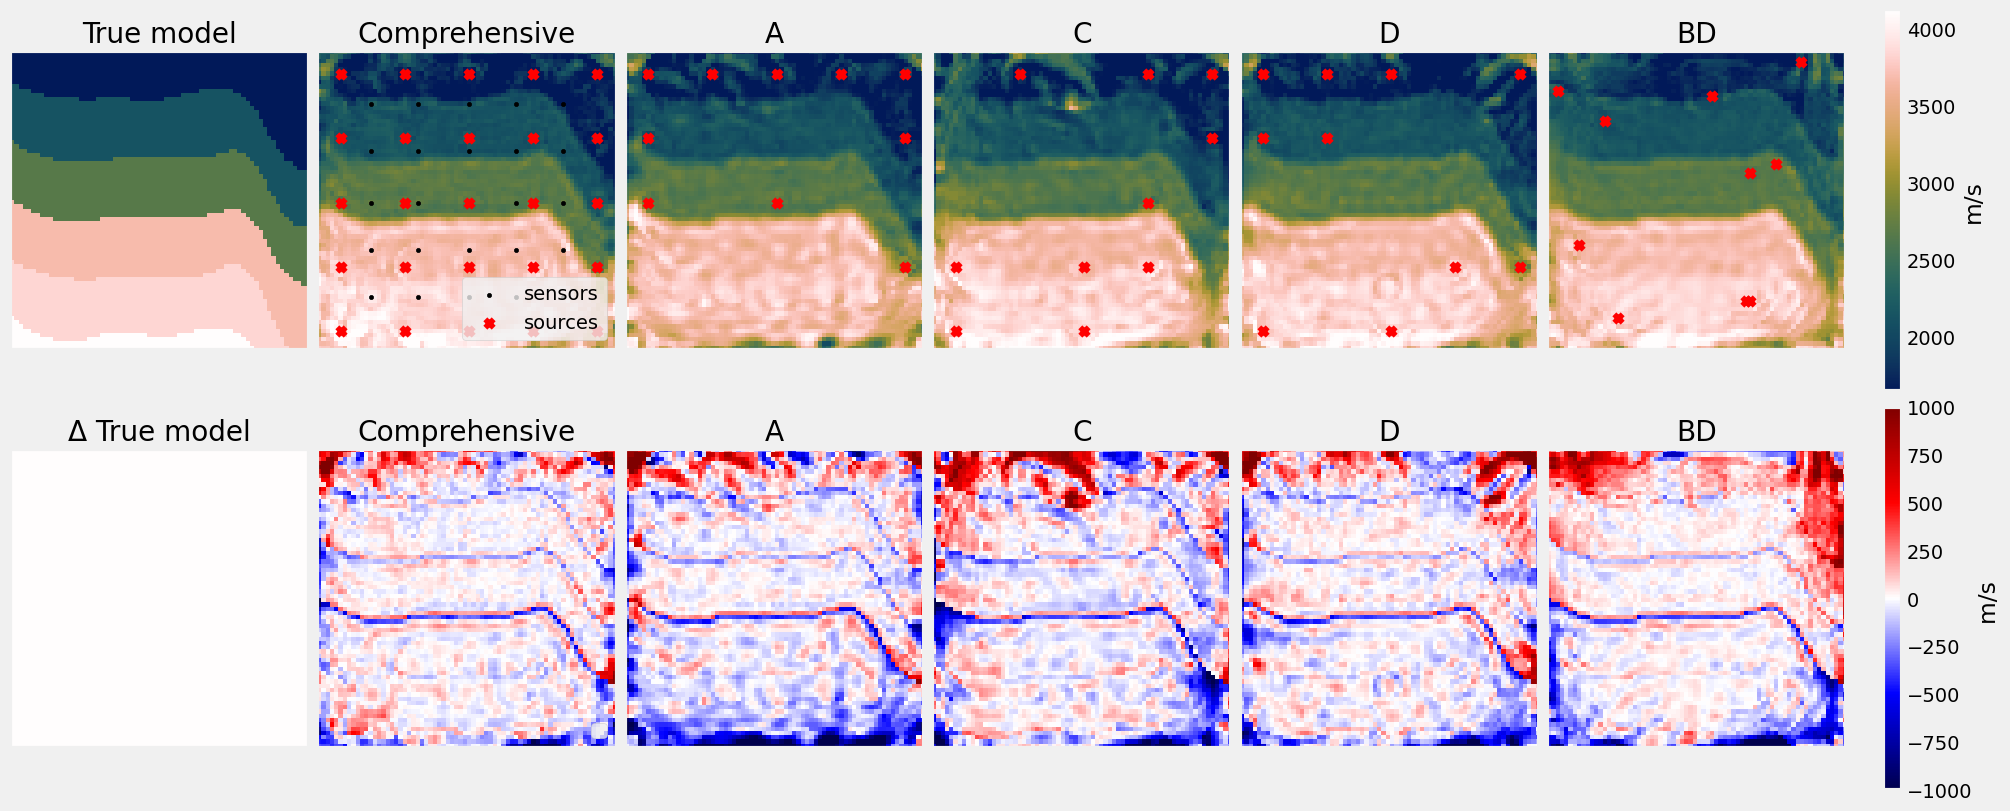

In [5]:
plt.style.use('fivethirtyeight')

file_names = [
    "comprehensive_case",
    "test_case_A",
    "test_case_C",
    "test_case_D",
    "test_case_BD"
]

is_4_sources = False  

# define your diff‐range limit:
diff_limit = 1000.0

# create a diverging norm centered on 0
diff_norm = TwoSlopeNorm(vmin=-diff_limit, vcenter=0, vmax=diff_limit)
fig, axs = plt.subplots(
    2, 6,
    figsize=(20, 8),
    constrained_layout=True   # carve out space for two colorbars
)

im_models = []
im_diffs  = []

# --- Top row, col 0: true model (batlowW) ---
axs[0, 0].imshow(true_model,
                 cmap=cm.batlowW,
                 vmin=vmin, vmax=vmax)
axs[0, 0].set_title("True model")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

# --- Bottom row, col 0: zero‐diff (seismic) ---
axs[1, 0].imshow(np.zeros_like(true_model),
                 cmap='seismic',
                 vmin=-vmax, vmax=vmax)
axs[1, 0].set_title("Δ True model")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

# --- Loop through each test case ---
for i, fname in enumerate(file_names):
    if is_4_sources and fname != "comprehensive_case":
        data = np.load(f"fwi_results_{fname}_4_sources.npz")
    else:
        data = np.load(f"fwi_results_{fname}.npz")
    final_model = data["final_model"]

    # Top row: final model
    source_positions = data["source_positions"]
    sensors_positions = data["sensors_positions"]
    axm = axs[0, i + 1]
    im1 = axm.imshow(final_model,
                     cmap=cm.batlowW,
                     vmin=vmin, vmax=vmax)

    if fname == "comprehensive_case":
        axm.scatter(
            sensors_positions[1],
            sensors_positions[0],
            c="k",
            marker=".",
            label="sensors",
        )
        axm.scatter(
            source_positions[1],
            source_positions[0],
            c="r",
            marker="x",
            label="sources",
        )
        
        axm.legend(loc="lower right")
        axm.set_title("Comprehensive")
    elif fname == "test_case_BD":
        axm.set_title("BD")
        axm.scatter(
            source_positions[1],
            source_positions[0],
            c="r",
            marker="x",
            label="sources",
        )
    else:
        axm.set_title(fname[-1])
        axm.scatter(
            source_positions[1],
            source_positions[0],
            c="r",
            marker="x",
            label="sources",
        )
    axm.set_xticks([])
    axm.set_yticks([])
    im_models.append(im1)

    # Bottom row: difference
    axd = axs[1, i + 1]
    diff_model = final_model - true_model
    im2 = axd.imshow(
        diff_model,
        cmap='seismic',
        norm=diff_norm       # <-- use the TwoSlopeNorm here
    )
    # axd.set_title(f"Δ: {fname}")
    if fname == "comprehensive_case":
        axd.legend(loc="lower right")
        axd.set_title("Comprehensive")
    elif fname == "test_case_BD":
        axd.set_title("BD")
    else:
        axd.set_title(fname[-1])
    axd.set_xticks([])
    axd.set_yticks([])
    im_diffs.append(im2)

# --------------------------------------------------------------------
# Shared colorbar for TOP ROW (true & final models, batlowW cmap)
# --------------------------------------------------------------------
cbar_top = fig.colorbar(
    im_models[0],         # any one of the batlowW‐mappables
    ax=axs[0, :],         # span all axes in the first row
    orientation='vertical',
    fraction=0.025,       # bar width as fraction of figure width
    pad=0.02              # gap between axes and colorbar
)
cbar_top.set_label('m/s')

# --------------------------------------------------------------------
# Shared colorbar for BOTTOM ROW (all diffs, seismic cmap)
# --------------------------------------------------------------------
cbar_bot = fig.colorbar(
    im_diffs[0],          # any one of the seismic‐mappables
    ax=axs[1, :],         # span all axes in the second row
    orientation='vertical',
    fraction=0.025,
    pad=0.02
)
cbar_bot.set_label('m/s ')

# plt.show()
# Save the figure
# if is_4_sources:
#     plt.savefig("fwi_results_comparison_4_sources.pdf", bbox_inches='tight')
# else:
#     plt.savefig("fwi_results_comparison_10_sources.pdf", bbox_inches='tight')

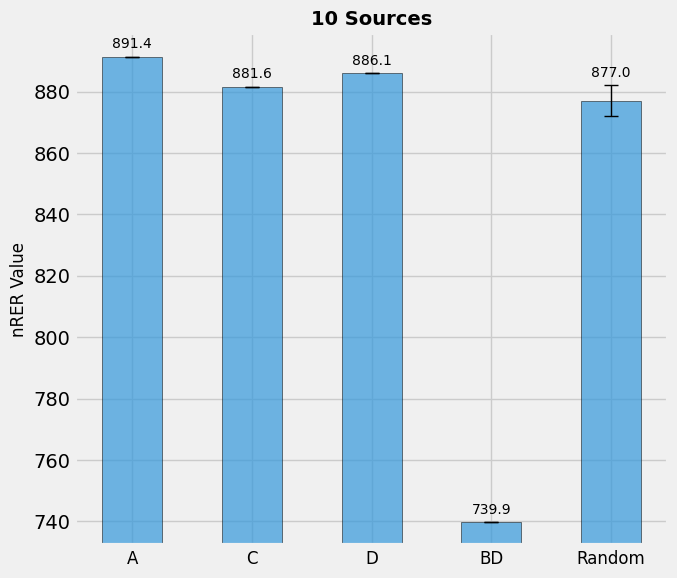

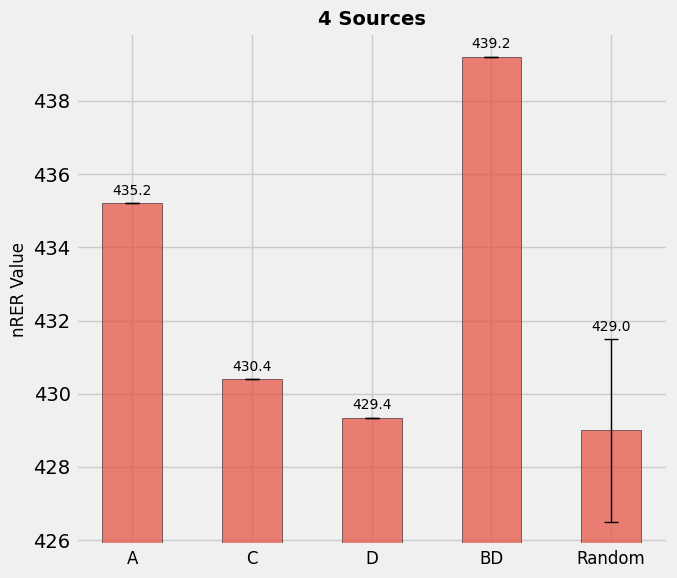

In [6]:
# Data (excluding 'Comprehensive')
categories = ['A', 'C', 'D', 'BD', 'Random']
values_10 = np.array(nRER[:-1])
values_10 = np.append(values_10, 877.00)
errors_10 = np.array([0, 0, 0, 0, 5.0])

values_4  = np.array([435.22, 430.41, 429.35, 439.21, 429.00])
errors_4  = np.array([0, 0, 0, 0, 2.5]) 

x = np.arange(len(categories))
width = 0.5

def calc_ylim(vals, errs):
    valid = ~np.isnan(vals)
    vals_min = np.min(vals[valid] - errs[valid])
    vals_max = np.max(vals[valid] + errs[valid])
    margin = (vals_max - vals_min) * 0.05
    return vals_min - margin, vals_max + margin

# --- 10 sources ---
ymin10, ymax10 = calc_ylim(values_10, errors_10)
plt.style.use('fivethirtyeight')
fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.bar(x, values_10, width, color='#3498DB', edgecolor='k', alpha=0.7, yerr=errors_10, capsize=5, error_kw=dict(elinewidth=1, capthick=1))
ax1.set_xticks(x)
ax1.set_xticklabels(categories, fontsize=12)
ax1.set_ylim(ymin10, ymax10)
ax1.set_ylabel('nRER Value', fontsize=12)
ax1.set_title('10 Sources', fontsize=14, fontweight='bold')
for xi, yi, ei in zip(x, values_10, errors_10):
    ax1.text(xi, yi + (ymax10-ymin10)*0.01 + ei, f'{yi:.1f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
# plt.show()
# plt.savefig("barplot_nRER_10sources.pdf")

# --- 4 sources ---
ymin4, ymax4 = calc_ylim(values_4, errors_4)
fig2, ax2 = plt.subplots(figsize=(7, 6))
mask4 = ~np.isnan(values_4)
ax2.bar(x[mask4], values_4[mask4], width, color='#E74C3C', edgecolor='k', alpha=0.7, yerr=errors_4[mask4], capsize=5, error_kw=dict(elinewidth=1, capthick=1))
ax2.set_xticks(x)
ax2.set_xticklabels(categories, fontsize=12)
ax2.set_ylim(ymin4, ymax4)
ax2.set_ylabel('nRER Value', fontsize=12)
ax2.set_title('4 Sources', fontsize=14, fontweight='bold')
for xi, yi, ei in zip(x[mask4], values_4[mask4], errors_4[mask4]):
    ax2.text(xi, yi + (ymax4-ymin4)*0.01 + ei, f'{yi:.1f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
# plt.show()
# plt.savefig("barplot_nRER_4sources.pdf")


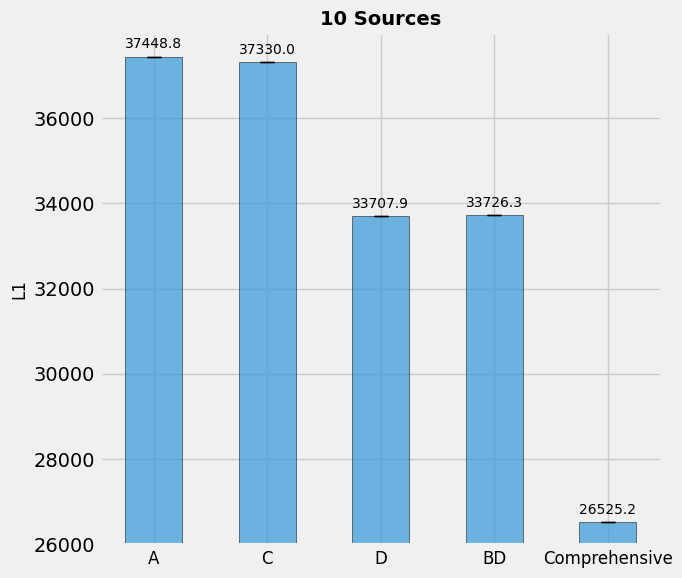

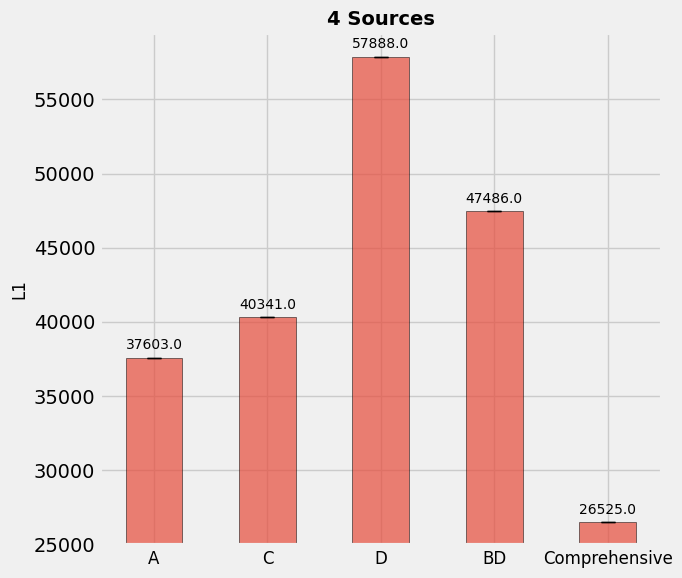

In [7]:
# Data (excluding 'Comprehensive')
categories = ['A', 'C', 'D', 'BD',"Comprehensive"]
# l1_10 = np.array([26525,37448,37329,33707,25283])
l1_10 = np.array(l1)

l2_10 = np.array(l2)
# l2_10 = np.array([37619,86647,80908,62407,55980])

errors_10 = np.array([0, 0, 0, 0, 0.0])

# l1_4  = np.array([26525,31024,36500,49230,45587.89])
# l2_4  = np.array([37619,95026,103083,239845,124899.64])
l1_4  = np.array([37603,40341,57888,47486,26525])
l2_4  = np.array([145560,120459,146085,129309,37619])
errors_4  = np.array([0, 0, 0,    0,0]) 
x = np.arange(len(categories))
width = 0.5

# Calculate y-limits excluding NaNs
def calc_ylim(vals, errs):
    valid = ~np.isnan(vals)
    vals_min = np.min(vals[valid] - errs[valid])
    vals_max = np.max(vals[valid] + errs[valid])
    margin = (vals_max - vals_min) * 0.05
    return vals_min - margin, vals_max + margin

# --- 10 sources ---
ymin10, ymax10 = calc_ylim(l1_10, errors_10)
fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.bar(x, l1_10, width, color='#3498DB', edgecolor='k', alpha=0.7, yerr=errors_10, capsize=5, error_kw=dict(elinewidth=1, capthick=1))
ax1.set_xticks(x)
ax1.set_xticklabels(categories, fontsize=12)
ax1.set_ylim(ymin10, ymax10)
ax1.set_ylabel('L1', fontsize=12)
ax1.set_title('10 Sources', fontsize=14, fontweight='bold')
for xi, yi, ei in zip(x, l1_10, errors_10):
    ax1.text(xi, yi + (ymax10-ymin10)*0.01 + ei, f'{yi:.1f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
# plt.show()
# plt.savefig("barplot_L1_10sources.pdf")

# --- 4 sources ---
ymin4, ymax4 = calc_ylim(l1_4, errors_4)
fig2, ax2 = plt.subplots(figsize=(7, 6))
mask4 = ~np.isnan(l1_4)
ax2.bar(x[mask4], l1_4[mask4], width, color='#E74C3C', edgecolor='k', alpha=0.7, yerr=errors_4[mask4], capsize=5, error_kw=dict(elinewidth=1, capthick=1))
ax2.set_xticks(x)
ax2.set_xticklabels(categories, fontsize=12)
ax2.set_ylim(ymin4, ymax4)
ax2.set_ylabel('L1', fontsize=12)
ax2.set_title('4 Sources', fontsize=14, fontweight='bold')
for xi, yi, ei in zip(x[mask4], l1_4[mask4], errors_4[mask4]):
    ax2.text(xi, yi + (ymax4-ymin4)*0.01 + ei, f'{yi:.1f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
# plt.show()
# plt.savefig("barplot_L1_4sources.pdf")


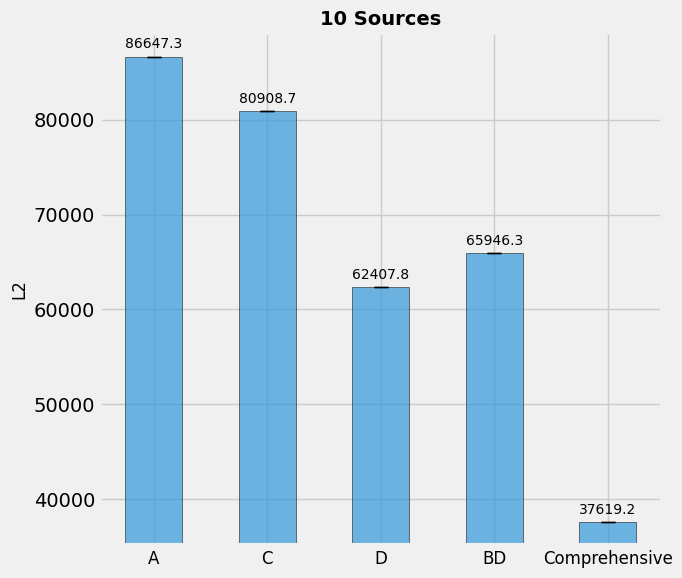

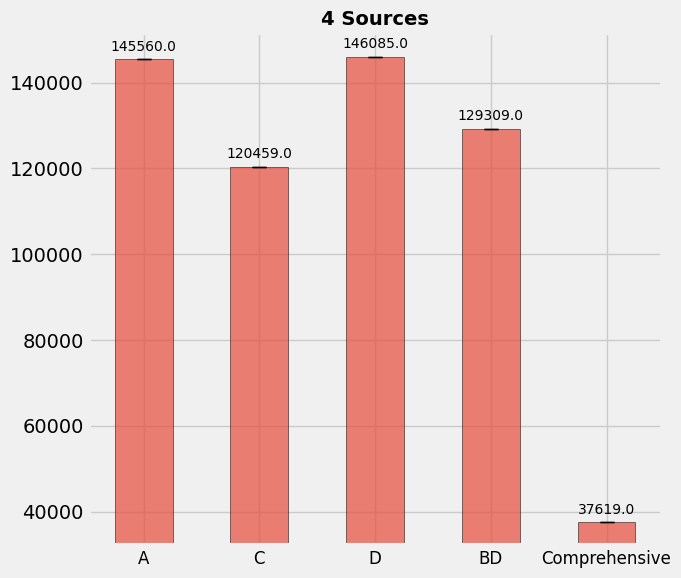

In [8]:
# Calculate y-limits excluding NaNs
def calc_ylim(vals, errs):
    valid = ~np.isnan(vals)
    vals_min = np.min(vals[valid] - errs[valid])
    vals_max = np.max(vals[valid] + errs[valid])
    margin = (vals_max - vals_min) * 0.05
    return vals_min - margin, vals_max + margin

ymin10, ymax10 = calc_ylim(l2_10, errors_10)
ymin4, ymax4   = calc_ylim(l2_4, errors_4)

# --- 10 sources ---
fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.bar(x, l2_10, width, color='#3498DB', edgecolor='k', alpha=0.7, yerr=errors_10, capsize=5, error_kw=dict(elinewidth=1, capthick=1))
ax1.set_xticks(x)
ax1.set_xticklabels(categories, fontsize=12)
ax1.set_ylim(ymin10, ymax10)
ax1.set_ylabel('L2', fontsize=12)
ax1.set_title('10 Sources', fontsize=14, fontweight='bold')
for xi, yi, ei in zip(x, l2_10, errors_10):
    ax1.text(xi, yi + (ymax10-ymin10)*0.01 + ei, f'{yi:.1f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
# plt.show()
# plt.savefig("barplot_L2_10sources.pdf")

# --- 4 sources ---
fig2, ax2 = plt.subplots(figsize=(7, 6))
mask4 = ~np.isnan(l2_4)
ax2.bar(x[mask4], l2_4[mask4], width, color='#E74C3C', edgecolor='k', alpha=0.7, yerr=errors_4[mask4], capsize=5, error_kw=dict(elinewidth=1, capthick=1))
ax2.set_xticks(x)
ax2.set_xticklabels(categories, fontsize=12)
ax2.set_ylim(ymin4, ymax4)
ax2.set_title('4 Sources', fontsize=14, fontweight='bold')
for xi, yi, ei in zip(x[mask4], l2_4[mask4], errors_4[mask4]):
    ax2.text(xi, yi + (ymax4-ymin4)*0.01 + ei, f'{yi:.1f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
# plt.show()
# plt.savefig("barplot_L2_4sources.pdf")